Zach Wissner-Gross attributes the following problem to Bart Wright in "<a href="NEED">Can You Flip Your Way to Freedom?</a>" (May 1, 2020):

>You are locked in the dungeon of a faraway castle with three fellow prisoners (i.e., there are four prisoners in total), each in a separate cell with no means of communication. But it just so happens that all of you are logicians (of course).
>
>To entertain themselves, the guards have decided to give you all a single chance for immediate release. Each prisoner will be given a fair coin, which can either be fairly flipped one time or returned to the guards without being flipped. If all flipped coins come up heads, you will all be set free! But if any of the flipped coins comes up tails, or if no one chooses to flip a coin, you will all be doomed to spend the rest of your lives in the castle’s dungeon.
>
>The only tools you and your fellow prisoners have to aid you are random number generators, which will give each prisoner a random number, uniformly and independently chosen between zero and one.
>
>What are your chances of being released?
>
>*Extra credit:* Instead of four prisoners, suppose there are $N$ prisoners. Now what are your chances of being released?

I assume that each of the prisoners knows the total number $N$ of prisoners. If each of the prisoners flips the coin with probability $p,$ i.e., when the random number generator yields a value less than $p,$ then the total number $X$ of flips is binomially distributed. That is, the probability that $k$ of $N$ prisoners flip the coin is

$$\Pr\{X = k\} = {N \choose k} p^k (1-p)^{N-k}.$$

When $k=0$ prisoners flip coins, the chance of freedom is zero. When $k \geq 1$ of the $N$ prisoners flip coins, the chance that all of the tosses result in heads, i.e., the chance of freedom, is $2^{-k}.$ Thus if each of the prisoners flips the coin with probability $p,$ then the chance of freedom is:

\begin{align*}
   q_N(p)
   &= \sum_{i=1}^{N} \Pr\{X = k\} \cdot 2^{-k} \\
   &= \sum_{i=1}^{N} {N \choose k} p^k (1-p)^{N-k} 2^{-k} \\
   &= \sum_{i=1}^{N} {N \choose k} \left(\frac{p}{2} \right)^{\!k} (1-p)^{N-k} \\
   &= \left( 1 - \frac{p}{2} \right)^{\!N} - (1 - p)^N .
\end{align*}

(I obtained the last equality, and also the equalities that follow, using WolframAlpha. Below, we check the equalities numerically.) To find the value of $p$ that maximizes their chance of freedom, each of the prisoners equates the derivative of $q_n(p)$ to zero, i.e.,

$$\frac{\text{d}q_N(p)}{\text{d}p} = N(1-p)^{N-1} - \frac{1}{2} N \left(1-\frac{p}{2} \right)^{\!N-1} = 0,$$

and solves for $p.$ The result is

$$\DeclareMathOperator*{\argmax}{argmax}
p^*_N = \argmax_p q_N(p) = \frac{2^{1/(N-1)+1} - 2}{2^{1/(N-1)+1} - 1},$$

and the chance of freedom, when each of the prisoners flips the coin with probability $p^*_N,$ is

\begin{align*}
q^*_N 
   &= q_N(p^*_N) \\
   &= \left( \frac{2^{1/(N-1)}}{2^{1/(N-1)+1} - 1}\right)^{\!N}
      -\left( \frac{1}{2^{1/(N-1)+1} - 1}\right)^{\!N}.
\end{align*}

As shown in the following code cell, when $N=4,$

\begin{align*}
   q^*_4 
      &= \left( \frac{\sqrt[3]{2}}{2\sqrt[3]{2} - 1}\right)^{\!4}
      -\left( \frac{1}{2\sqrt[3]{2} - 1}\right)^{\!4} \\
      &\approx .2848.
\end{align*}

In [2]:
root = 2**(1/3)
q_star4 = (root/(2*root - 1))**4 - (1/(2*root-1))**4

Now we numerically verify the foregoing analytic results.

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import mp

# Use the Seaborn package to generate plots.
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2})
sns.set_style("darkgrid", {"axes.facecolor": ".92"})
sns.set_palette(sns.color_palette("Set2", 4))

# Calculations are done with multiprecision floating-point numbers. The
# following line sets the number of digits of precision.
mp.dps = 100

def chance(p, n):
    """
    Returns chance of freedom when `n` prisoners toss with probability `p`.
    """
    # Calculate the value according to the original formula.
    terms = [mp.binomial(n, k) * p**k * (1-p)**(n-k) * 2**-k
                for k in range(1, n+1)]
    return mp.fsum(terms)

def fast_chance(p, n):
    """
    Returns chance of freedom when `n` prisoners toss with probability `p`.
    """
    # Calculate the value according to the simplified formula.
    return (1 - p/2)**n - (1 - p)**n

def p_star(n):
    """
    Returns the optimal tossing probability for `n` prisoners.
    """
    top = 2 * (2**(mp.mpf(1)/(n-1)) - 1)
    bottom = 2**(mp.mpf(1)/(n-1)+1) - 1
    return top / bottom

def best_chance(n):
    """
    Returns the chance of freedom when the tossing probability is optimal.
    """
    result = (2**(mp.mpf(1)/(n - 1))/(2**(mp.mpf(1)/(n - 1) + 1) - 1))**n 
    result -= (1/(2**(mp.mpf(1)/(n - 1) + 1) - 1))**n
    #
    # Verify that the result is very close to the results of two other
    # calculations.
    best_p = p_star(n)
    assert mp.fabs(result - chance(best_p, n)) < 2**-mp.dps
    assert mp.fabs(result - fast_chance(best_p, n)) < 2**-mp.dps
    return result

In [56]:
P = mp.linspace(0, 1.0, 10001)
N = [2, 4, 8, 16, 32]
q_fast = np.array([[fast_chance(p, n) for p in P]
                       for n in N])
q_slow = np.array([[chance(p, n) for p in P]
                       for n in N])
q_star = [best_chance(n) for n in N]

<IPython.core.display.Javascript object>


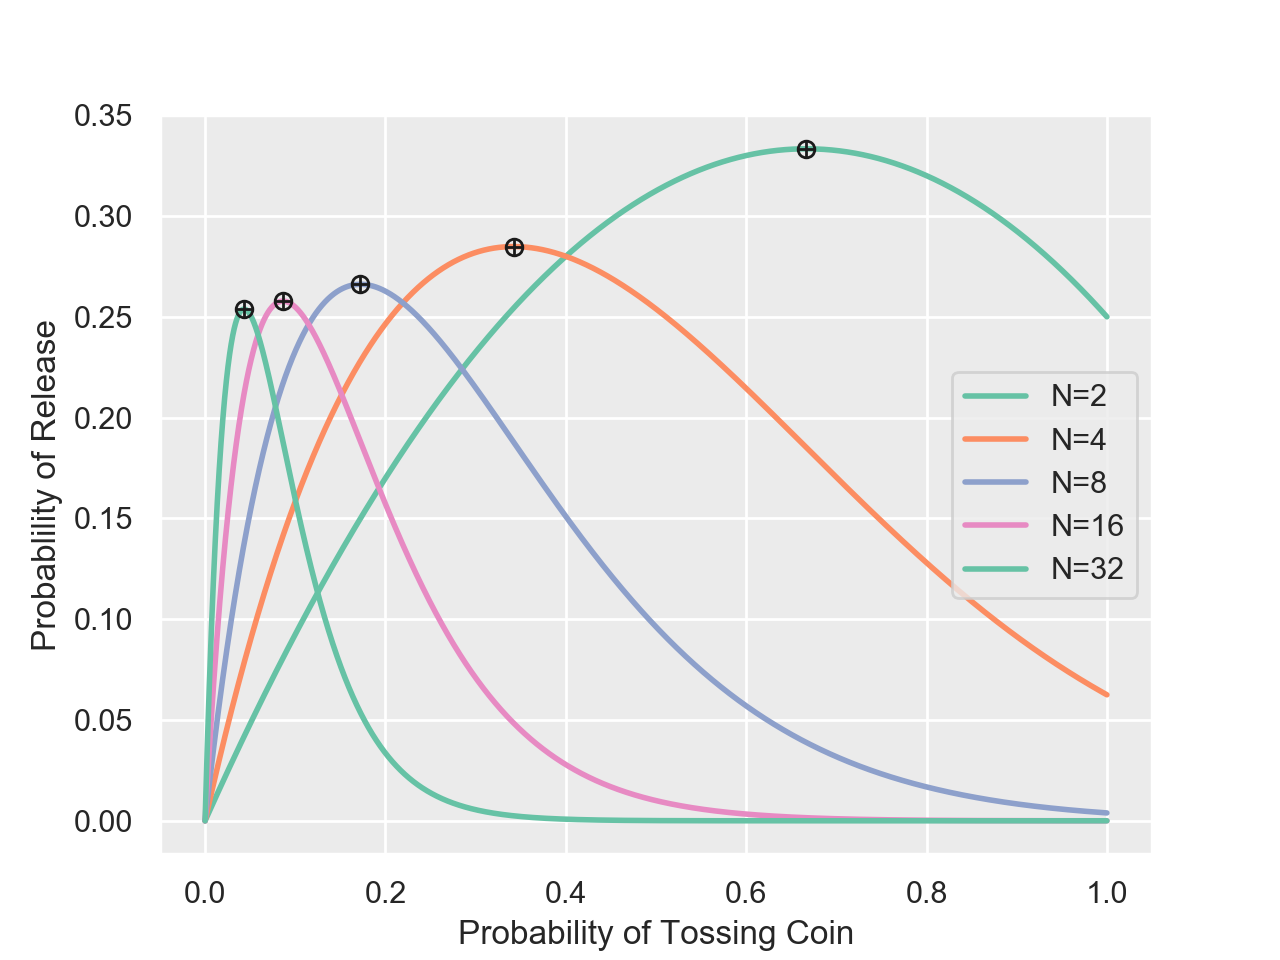

In [57]:
for q, q_max, n in zip(q_fast, q_star, N):
    plt.plot(P, q, label='N={}'.format(n))
    p = p_star(n)
    plt.plot([p], [q_max], marker='+', c='k')
    plt.plot([p], [chance(p, n)], marker='o', mfc='none', c='k')
    plt.xlabel('Probability of Tossing Coin')
    plt.ylabel('Probablility of Release')
plt.legend(loc='best')

Verify that the difference in values of $q_N,$ calculated according to the original formula and the simplified formula, is very small.

In [48]:
np.max(np.abs(q_fast - q_slow)) < 2**mp.dps

True

In [60]:
best_chance(32), chance(p_star(32), 32), max(q_fast[-1])

(mpf('0.25381890639100898557973754940236757858595426075671849385464039974889267266909058070812353343077246569196353393954686595044579141462432775121518247176522348787431024964001902441427158590934677092604997416619050166942268820614323500383305701097804617549731865906109092479669540796937466098975616097440072969070015867553961098025326846553386511055924338717420748129985901260086985741614702654163794501622008372304949449412470645179144946020619797215604759411316093929608830014955441336757269845722177169637'),
 mpf('0.253818906391008985579737549402367578585954260756718493854640399748892672669090580708123533430772465691963533939546865950445791414624327751215182471765223487874310249640019024414271585909346770926049974166190501669422688206143235003833057010978046175497318659061090924796695407969374660989756160974400729690700158675539610980253268465533865110559243387174207481299859012600869857416147026541637945016220083723049494494124706451791449460206197972156047594113160939296088300149554

<IPython.core.display.Javascript object>


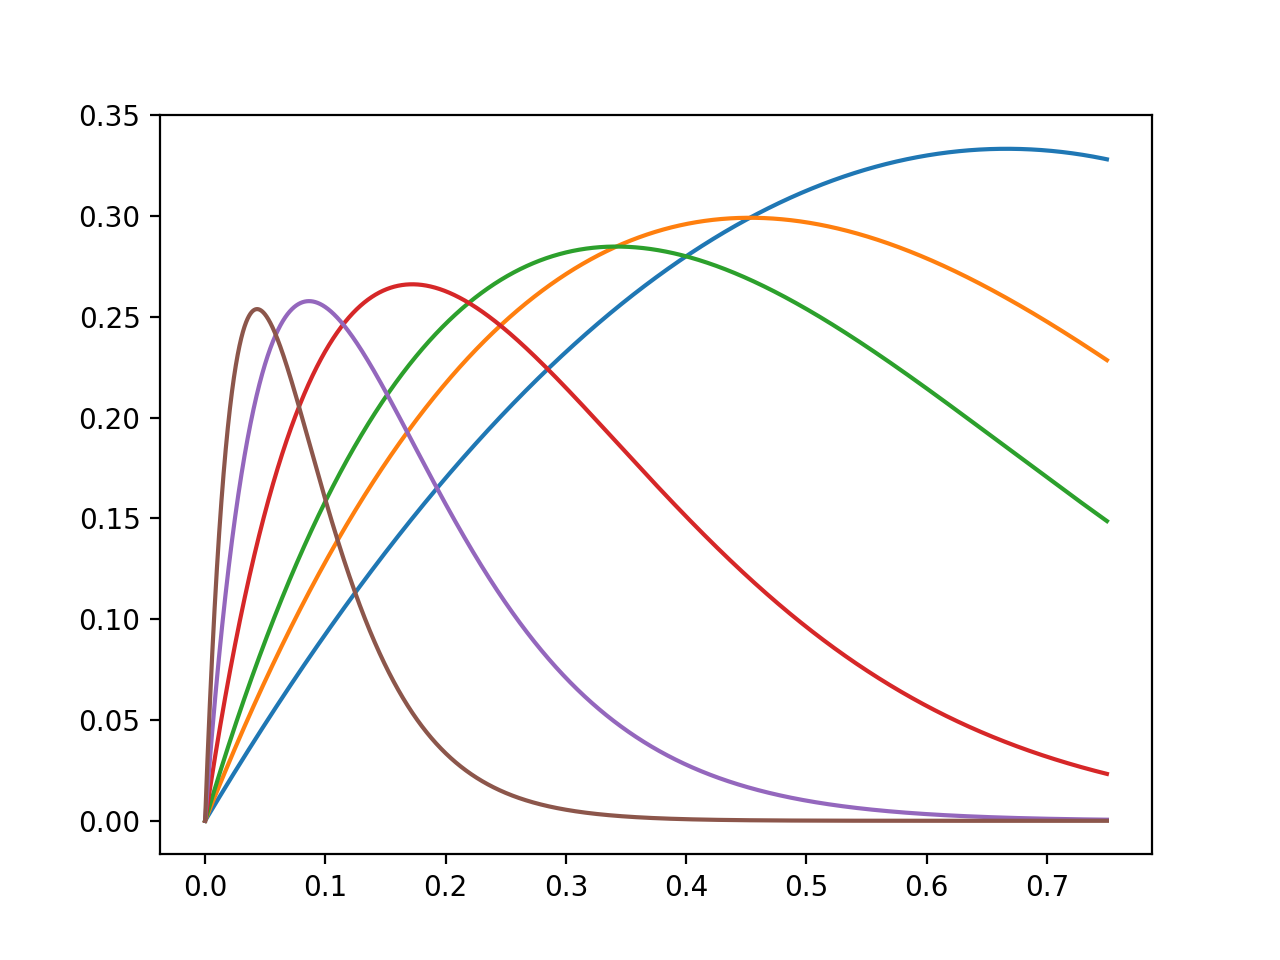

In [4]:

p = mp.linspace(0, .75, 75001)
q2 = [alt(pp,2) for pp in p]
q3 = [alt(pp,3) for pp in p]
q4 = [alt(pp,4) for pp in p]
q8 = [alt(pp,8) for pp in p]
q16 = [alt(pp,16) for pp in p]
qbig = [alt(pp,32) for pp in p]
plt.plot(p, q2)
plt.plot(p, q3)
plt.plot(p, q4)
plt.plot(p, q8)
plt.plot(p, q16)
plt.plot(p, qbig)

In [22]:
np.max(q2), p[np.argmax(q2)], solution(2)

(mpf('0.33333333332500004'), mpf('0.6666700000000001'), 0.6666666666666666)

In [23]:
np.max(q3), p[np.argmax(q3)], solution(3)

(mpf('0.29911947447584808'), mpf('0.45308000000000004'), 0.4530818393219729)

In [24]:
np.max(q4), p[np.argmax(q4)], solution(4)

(mpf('0.28484236890486603'), mpf('0.34204000000000001'), 0.3420369128224971)

In [25]:
np.max(q8), p[np.argmax(q8)], solution(8)

(mpf('0.26612210613290771'), mpf('0.17231000000000002'), 0.17230809560123742)

In [26]:
np.max(q16), p[np.argmax(q16)], solution(16)

(mpf('0.25777351744229837'), mpf('0.086410000000000001'), 0.08641445403594654)

In [6]:
import numpy as np
np.abs(-1+2j)

2.23606797749979